**Quick Recap on Churn**

- Churn occurs when a client or employee leaves a company

- We can predict churn using a machine learning technique called binary classification


**How to doing it!**

1. Get data 

2. Load into Watson studio

3. Train the machine learning model using AutoAI(automated python machine learning pipeline)

4. Export the ML pipeline code to Python



Example : Gaming industry to retain cunstomer

**Importing the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Pre-processing**

In [3]:
# loading the dataset
churn_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Telco Customer Churn/Telco-Customer-Churn.csv')

In [4]:
# first 5 rows of the dataset
churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# shape of the dataset
churn_dataset.shape

(7043, 21)

In [6]:
# columns are
churn_dataset.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
## checking the data type of all the columns
churn_dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
## statistcal measure of the dataset
churn_dataset.describe() 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

- 75% customers have tenure less than 55 months

- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

Text(0.5, 1.02, 'Count of Target variable per category')

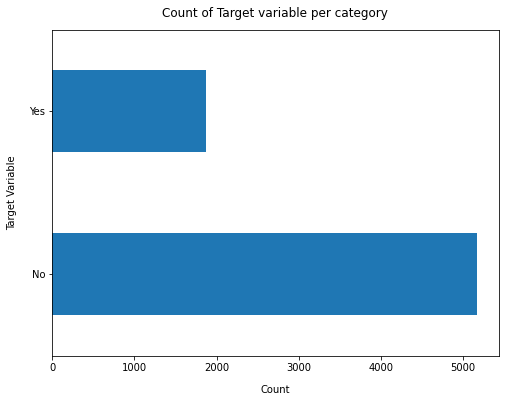

In [9]:
## to get the churners ratio
churn_dataset['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=12)
plt.ylabel("Target Variable", labelpad=12)
plt.title("Count of Target variable per category", y = 1.02)

In [10]:
# percentage of churn column 
100*churn_dataset['Churn'].value_counts()/len(churn_dataset['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

73% are Non-Churners

26% are actual churners

In [11]:
# total value counts of the dependent variable
churn_dataset['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

Data is highly imbalanced, ratio 73:27

Analyse the data with other features

In [12]:
# getting information of the dataset
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
## checking for missing values
churn_dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


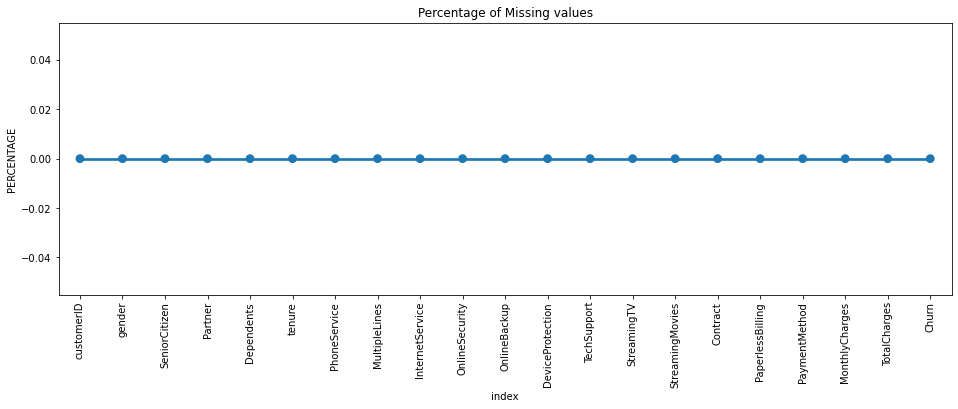

In [14]:
# Percentage of missing values
missing = pd.DataFrame((churn_dataset.isnull().sum())*100/churn_dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show() 

There is no missing values in the dataset.

Data Cleaning

In [15]:
# create a copy of base data for manupulation & processing
telecom_data = churn_dataset.copy()

In [16]:
telecom_data.TotalCharges = pd.to_numeric(telecom_data.TotalCharges, errors='coerce')
telecom_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [17]:
telecom_data.loc[telecom_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
#Removing missing values 
telecom_data.dropna(how = 'any', inplace = True)

#telecom.fillna(0)

In [19]:
## Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on..
## Get the max tenure
print(telecom_data['tenure'].max())  

72


In [20]:
# Group the 'tenure' in bins of 12 months
labels = [f"{i} {i+11}" for i in range(1,72,12)]
telecom_data['tenure_group'] = pd.cut(telecom_data.tenure, range(1,80,12), right=False, labels=labels)

In [21]:
telecom_data['tenure_group'].value_counts()

1 12     2175
61 72    1407
13 24    1024
25 36     832
49 60     832
37 48     762
Name: tenure_group, dtype: int64

Remove columns not required for processing

In [22]:
# drop the customerID and tenure
telecom_data.drop(columns=['customerID','tenure'], axis=1, inplace=True)
telecom_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 12


**Data Exploration**

Univariate Analysis

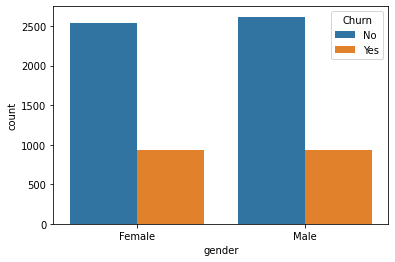

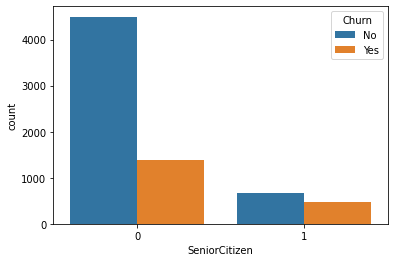

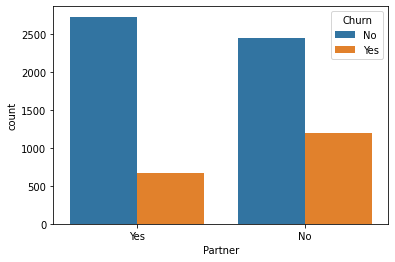

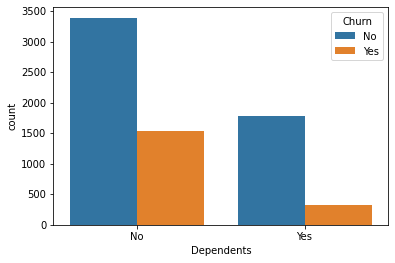

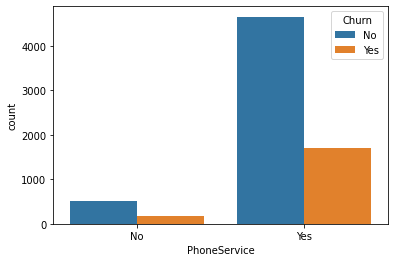

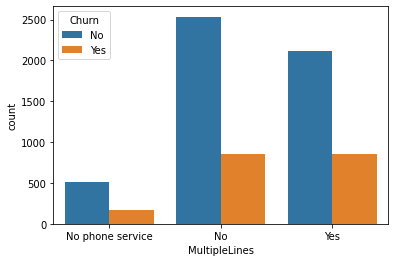

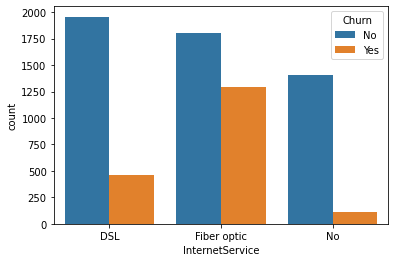

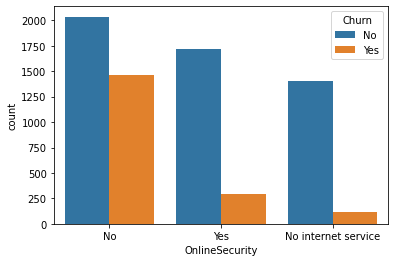

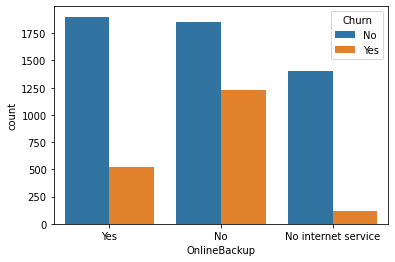

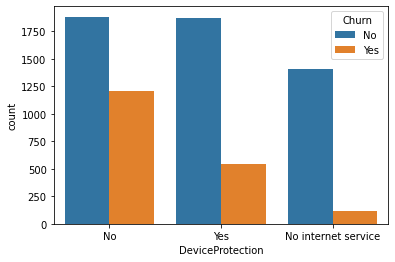

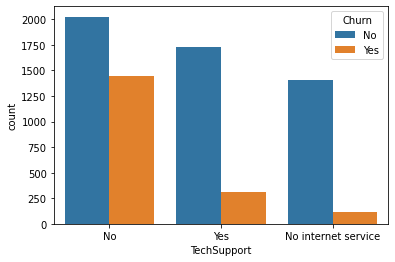

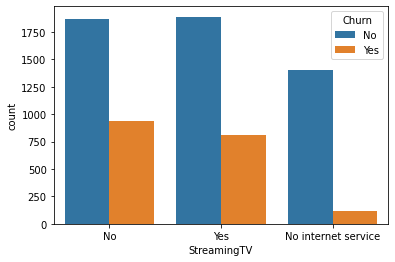

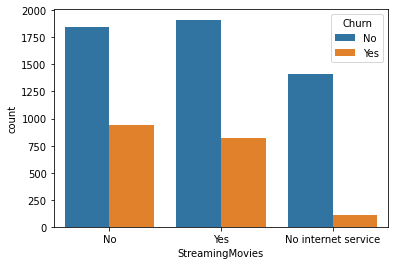

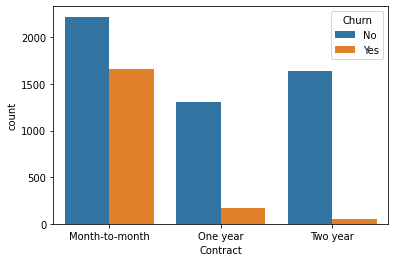

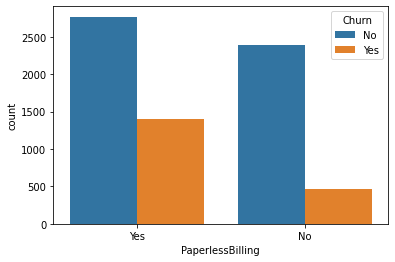

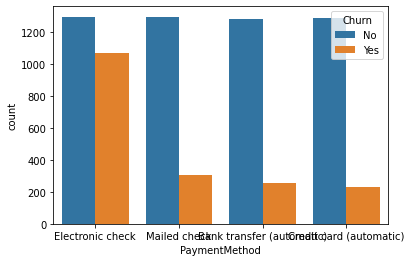

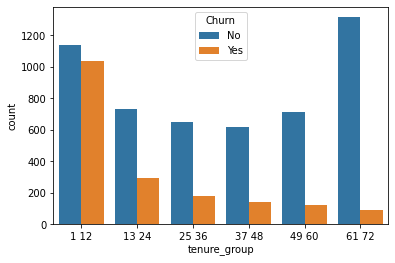

In [23]:
for i, predictor in enumerate(telecom_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=telecom_data, x = predictor, hue='Churn')

In [24]:
# change the values of target variable
telecom_data['Churn'] = np.where(telecom_data.Churn == 'Yes',1,0)

In [25]:
telecom_data['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Convert all the catewgorical variables into dummy variables

In [26]:
telecom_data_dummies = pd.get_dummies(telecom_data)
telecom_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 12,tenure_group_13 24,tenure_group_25 36,tenure_group_37 48,tenure_group_49 60,tenure_group_61 72
0,0,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0


In [27]:
# shape of the dummies data
telecom_data_dummies.shape

(7032, 51)

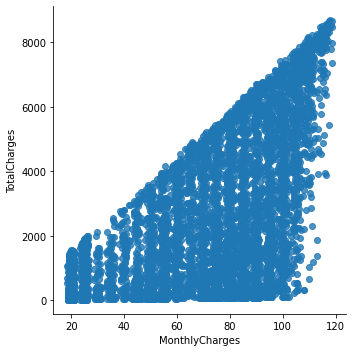

In [28]:
## relationship between MonthlyCharges and Total Charges/
sns.lmplot(data=telecom_data_dummies, x= 'MonthlyCharges', y='TotalCharges', fit_reg=False)

Monthly charges increases as well as Total charges Increases - as expected

Text(0.5, 1.0, 'Monthly Charges by Churn')

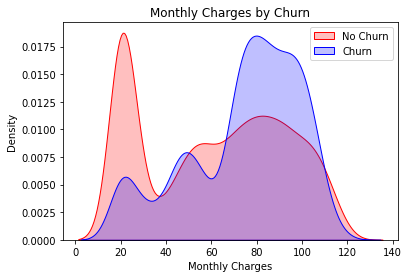

In [29]:
# plotting between 'MonthlyCharges' and 'Churn'

month  = sns.kdeplot(telecom_data_dummies.MonthlyCharges[(telecom_data_dummies['Churn'] == 0) ],
                     color="Red", shade = True)
month = sns.kdeplot(telecom_data_dummies.MonthlyCharges[(telecom_data_dummies['Churn'] == 1) ],
                    ax = month, color = "Blue", shade = True)
month.legend(['No Churn', 'Churn'], loc = 'upper right') 
month.set_ylabel('Density')
month.set_xlabel('Monthly Charges')
month.set_title('Monthly Charges by Churn')

Churn is high when Monthly Charges are high

Text(0.5, 1.0, 'Total Charges by Churn')

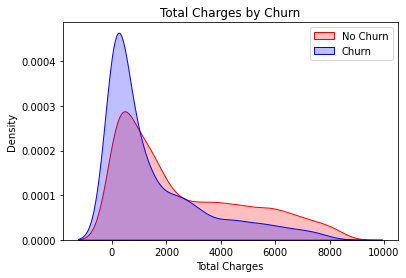

In [30]:
 # plotting between 'TotalCharges' and 'Churn'

total  = sns.kdeplot(telecom_data_dummies.TotalCharges[(telecom_data_dummies['Churn'] == 0) ],
                     color="Red", shade = True)
total = sns.kdeplot(telecom_data_dummies.TotalCharges[(telecom_data_dummies['Churn'] == 1) ],
                    ax = total, color = "Blue", shade = True)
total.legend(['No Churn', 'Churn'], loc = 'upper right') 
total.set_ylabel('Density')
total.set_xlabel('Total Charges')
total.set_title('Total Charges by Churn')

**Surprising insight** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**, **Lower tenure** and **Lower Total Charge** are linkd to High Churn.

11. Build a corelation of all predictors with 'Churn'

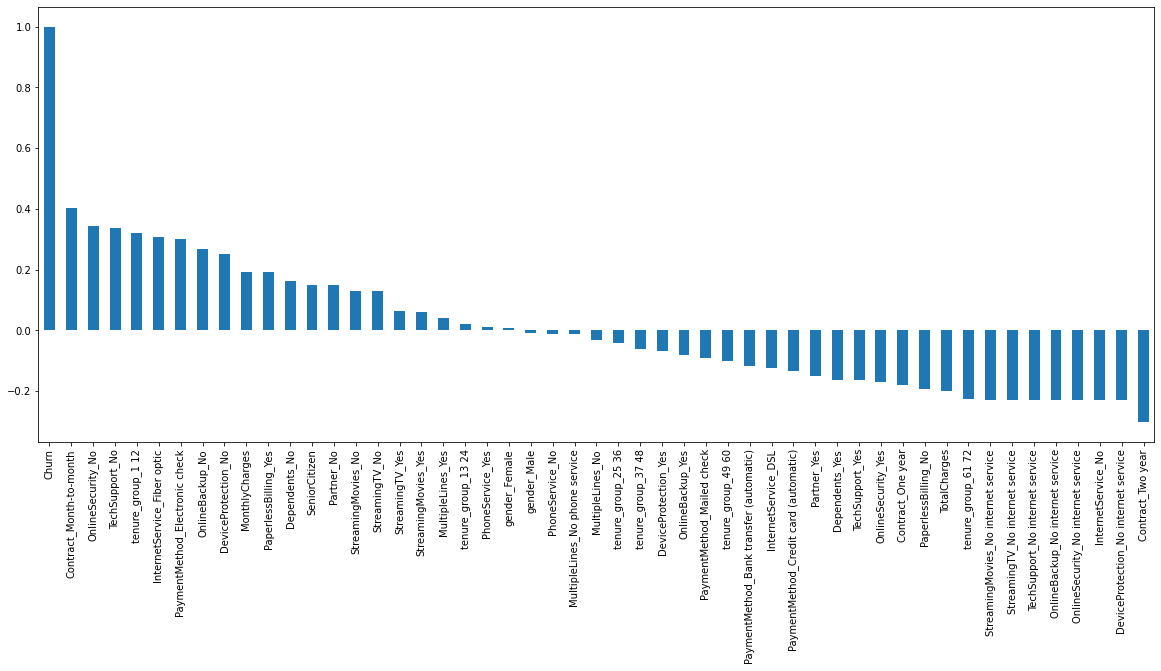

In [31]:
plt.figure(figsize=(20,8))
telecom_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**

HIGH Churn seen in case of **Month to month contracts**, **No online security**,** No Tech support**,** First year of subscription** and **Fibre Optics Internet**

LOW Churn is seens in case of **Long term contracts, Subscriptions without internet service **and **The customers engaged for 5+ years**

Factors like** Gender, Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

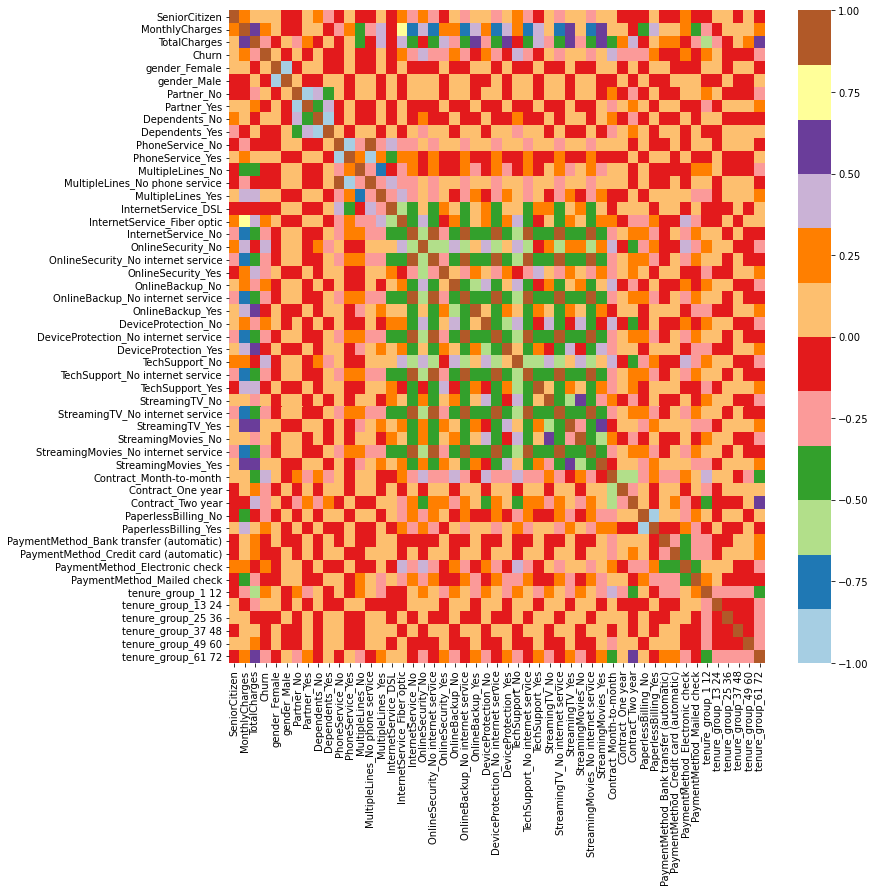

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(telecom_data_dummies.corr(), cmap='Paired')

**Bivariate Analysis**

In [33]:
new_target0 = telecom_data.loc[telecom_data['Churn'] == 0]
new_target1 = telecom_data.loc[telecom_data['Churn'] == 1]

In [34]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

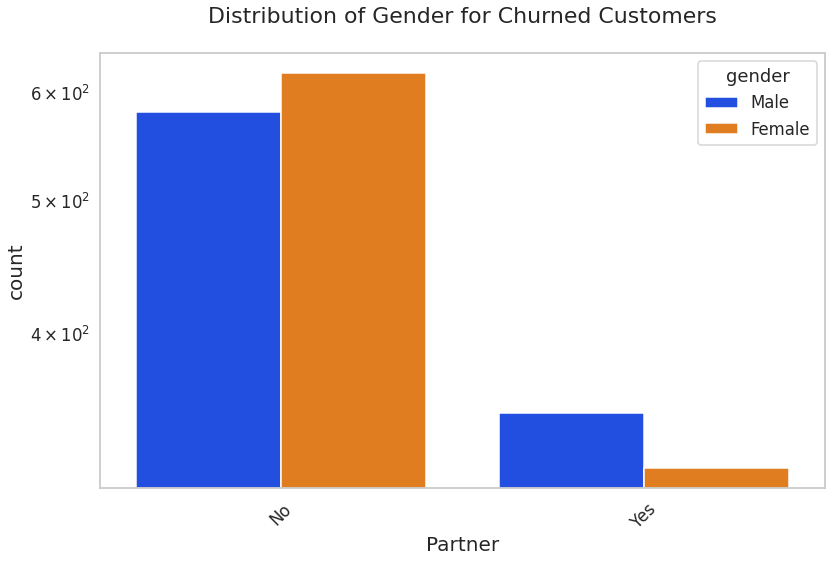

In [35]:
uniplot(new_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

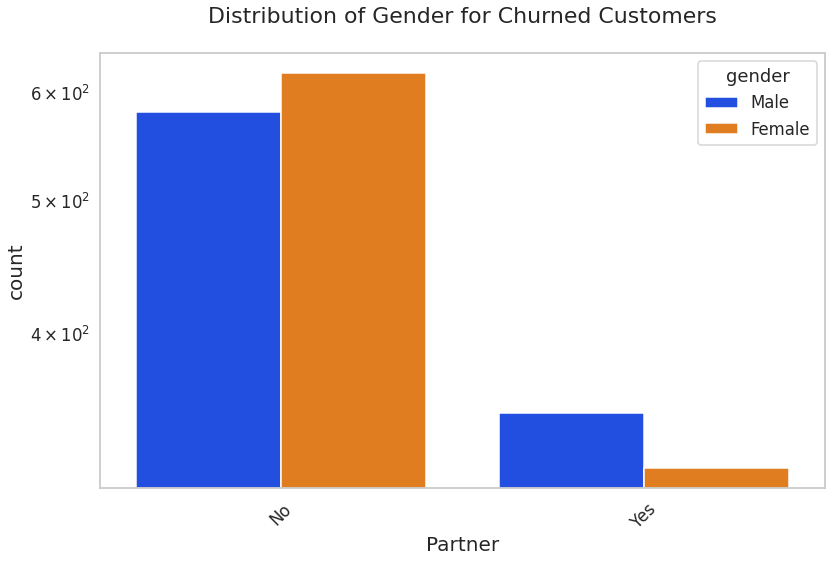

In [36]:
uniplot(new_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

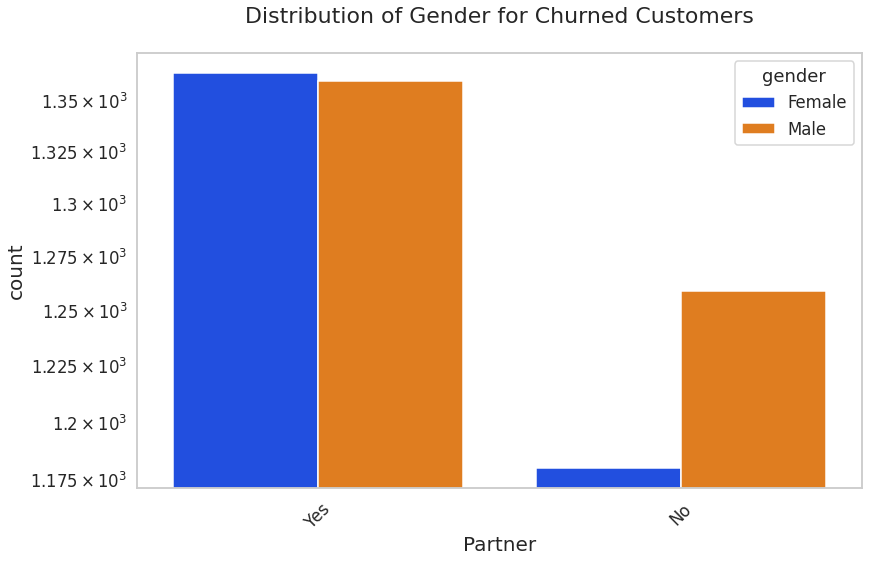

In [37]:
uniplot(new_target0,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

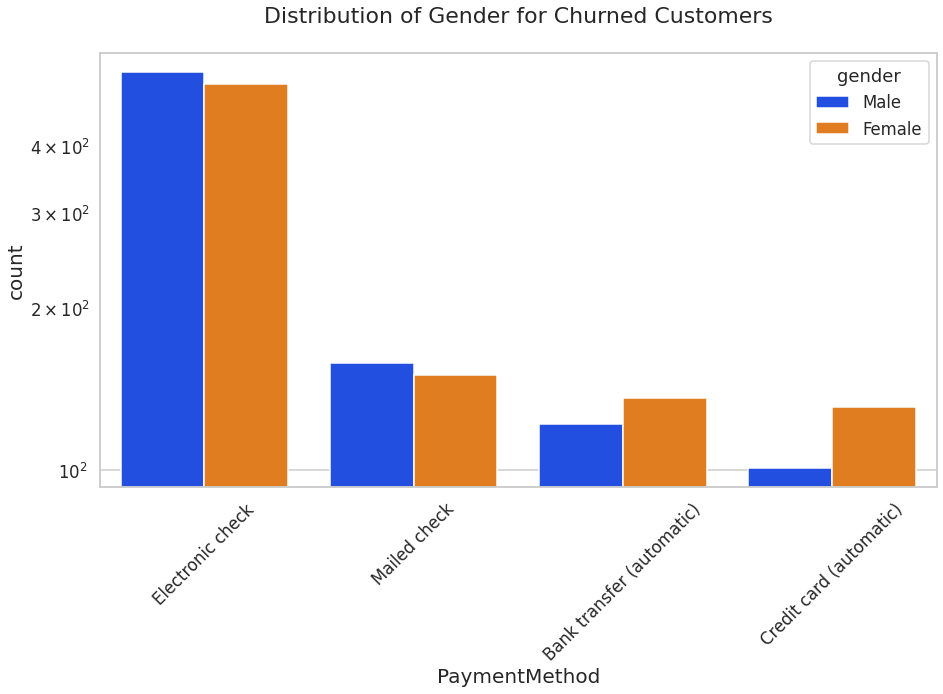

In [38]:
uniplot(new_target1,col='PaymentMethod',title='Distribution of Gender for Churned Customers',hue='gender')

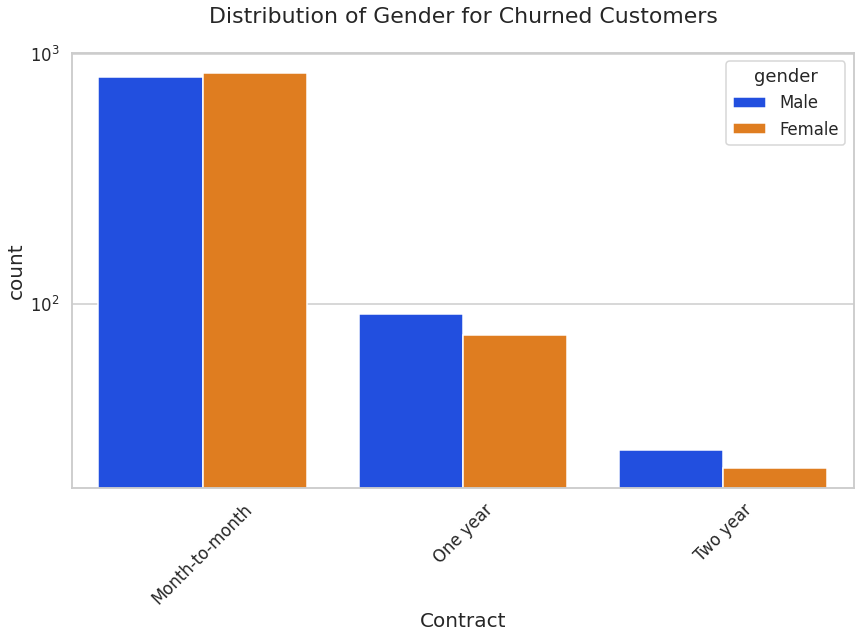

In [39]:
uniplot(new_target1,col='Contract',title='Distribution of Gender for Churned Customers',hue='gender')

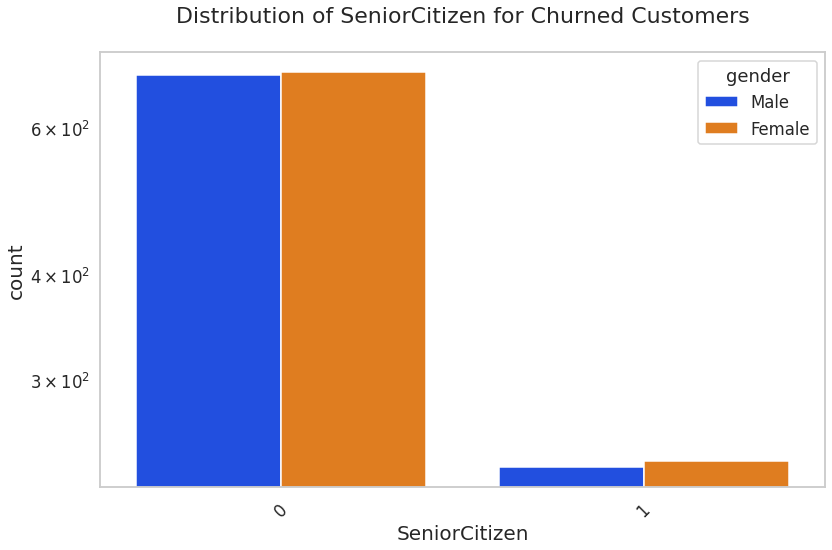

In [40]:
uniplot(new_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

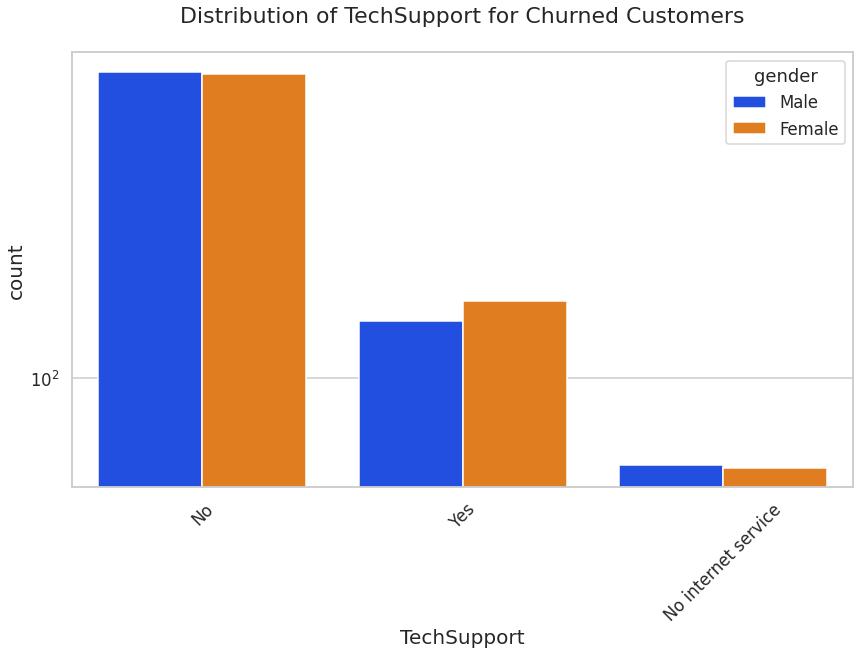

In [41]:
uniplot(new_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

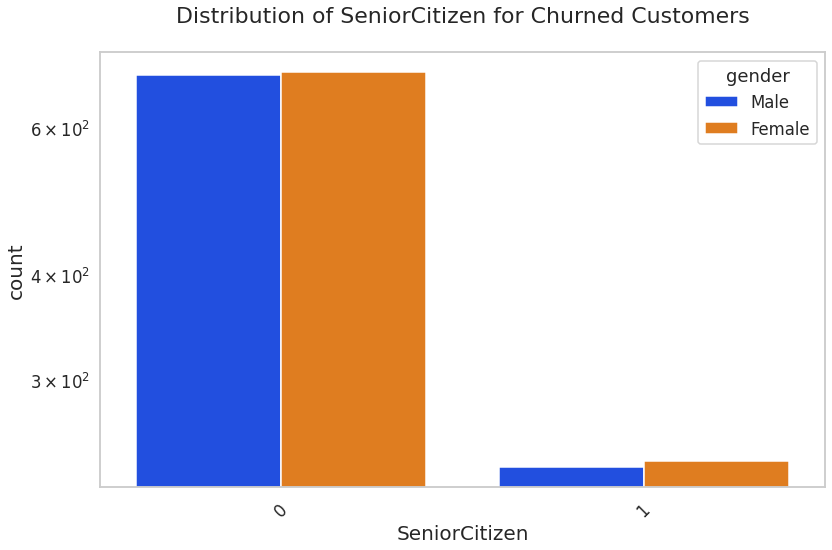

In [42]:
uniplot(new_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

**CONCLUSION**
These are some of the quick insights from this exercise:

- Electronic check medium are the highest churners
- Contract Type - Monthly customers are more likely to churn because of no - -- contract terms, as they are free to go customers.
- No Online security, No Tech Support category are high churners
  eeee- Non senior Citizens are high churners
Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [43]:
telecom_data_dummies.to_csv('tel_churan.csv')